# Final Codes Decision Tree & Logistic Regression Models

### Libraries

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

### Balance data

In [2]:
# Load the dataset
data = pd.read_csv("dataset(data) (3).csv")

# Separate the classes
win_data = data[data['Win'] == 1]
loss_data = data[data['Win'] == 0]

# Oversample the losses to match the number of wins
loss_data_oversampled = loss_data.sample(n=len(win_data), replace=True, random_state=42)

# Combine to form a balanced dataset
data_balanced = pd.concat([win_data, loss_data_oversampled])

### Preprosess and split data

In [3]:
# Preprocessing (assuming `data_balanced` is defined)
data_balanced = data_balanced.drop(columns=['MOV', 'Season', 'Opponent'])  # dropped specified columns
X = data_balanced.drop(columns=['Win'])
y = data_balanced['Win']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Decision Tree Model

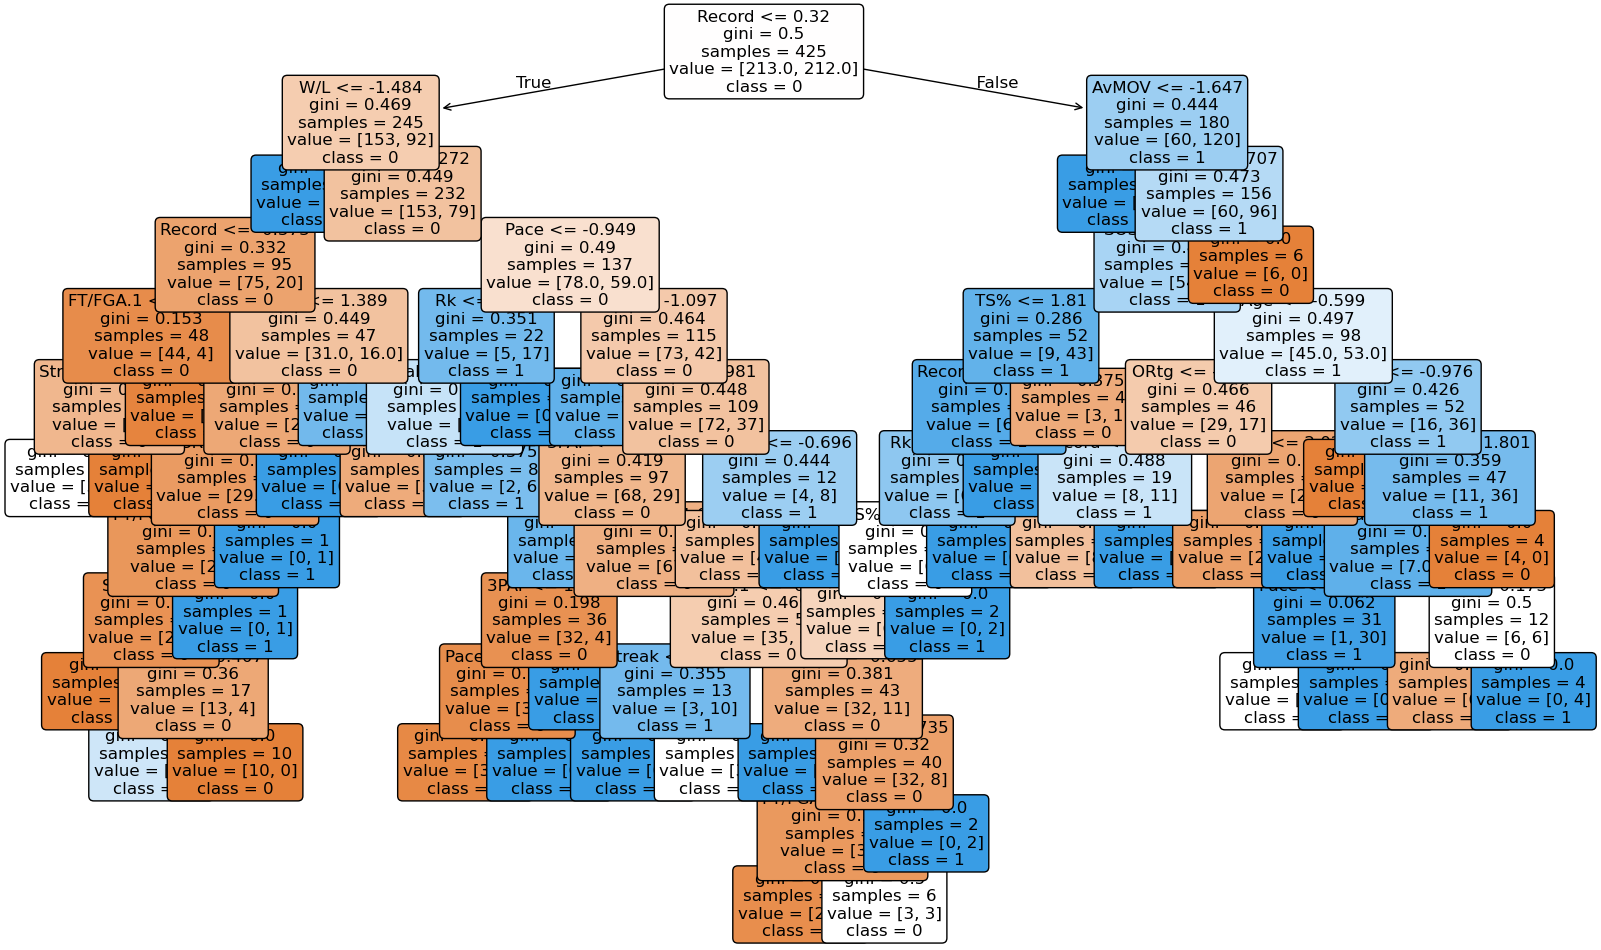

In [4]:
# Decision Tree with Grid Search
param_grid_dt = {
    'max_depth': list(range(5, 51)),
    'min_samples_split': list(range(10, 22)),
    'min_impurity_decrease': np.arange(0.0001, 0.005, 0.0001)
}

grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid_dt, cv=5, n_jobs=-1)
grid_dt.fit(X_train, y_train)
best_dt = grid_dt.best_estimator_

# Plot tree
# Plot tree with larger font size
plt.figure(figsize=(20, 12))  # Optional: increase figure size for better spacing
plot_tree(
    best_dt,
    feature_names=X.columns,
    class_names=['0', '1'],
    filled=True,
    rounded=True,
    fontsize=12  # <-- This increases the text size
)
plt.show()

### Decision Tree Evaluation

In [5]:
# Accuracy & Classification Report
print("Decision Tree - Train Accuracy:", accuracy_score(y_train, best_dt.predict(X_train)))
print("Decision Tree - Test Accuracy:", accuracy_score(y_test, best_dt.predict(X_test)))
print("\nClassification Report:\n", classification_report(y_test, best_dt.predict(X_test)))

Decision Tree - Train Accuracy: 0.8964705882352941
Decision Tree - Test Accuracy: 0.7289719626168224

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.83      0.75        53
           1       0.79      0.63      0.70        54

    accuracy                           0.73       107
   macro avg       0.74      0.73      0.73       107
weighted avg       0.74      0.73      0.73       107



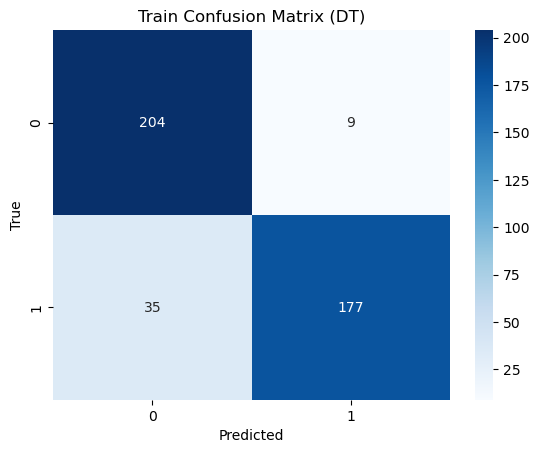

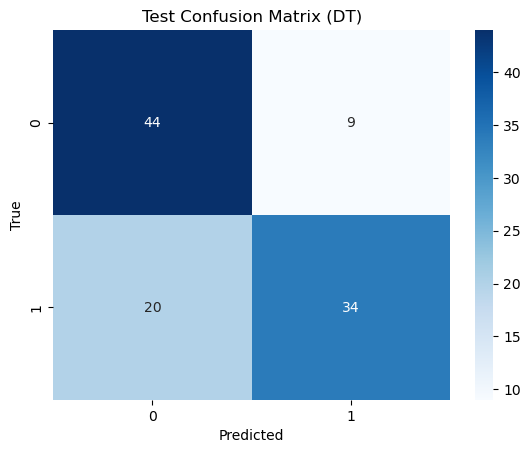

In [6]:
def plot_confusion_matrix(cm, title="Confusion Matrix"):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Confusion Matrices
plot_confusion_matrix(confusion_matrix(y_train, best_dt.predict(X_train)), title="Train Confusion Matrix (DT)")
plot_confusion_matrix(confusion_matrix(y_test, best_dt.predict(X_test)), title="Test Confusion Matrix (DT)")

# Logistic Regression Model

In [7]:
# Train Logistic Regression (no upsampling here)
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Evaluate
y_train_pred = log_model.predict(X_train)
y_test_pred = log_model.predict(X_test)

print("Logistic Regression - Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Logistic Regression - Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

Logistic Regression - Train Accuracy: 0.7058823529411765
Logistic Regression - Test Accuracy: 0.7383177570093458

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.74      0.74        53
           1       0.74      0.74      0.74        54

    accuracy                           0.74       107
   macro avg       0.74      0.74      0.74       107
weighted avg       0.74      0.74      0.74       107



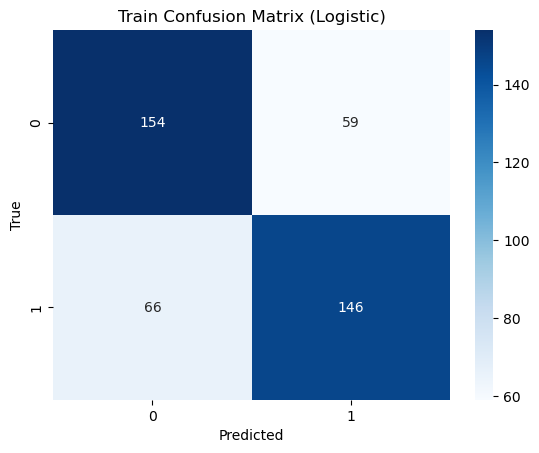

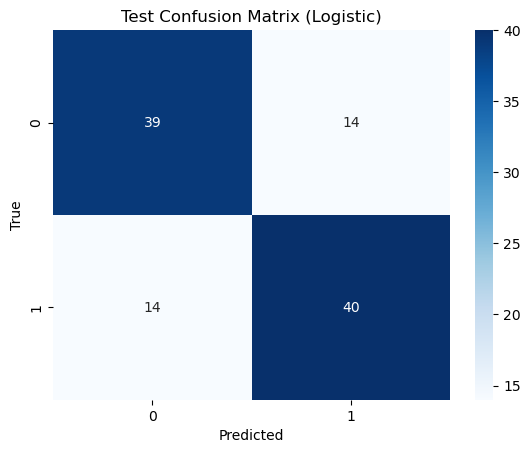

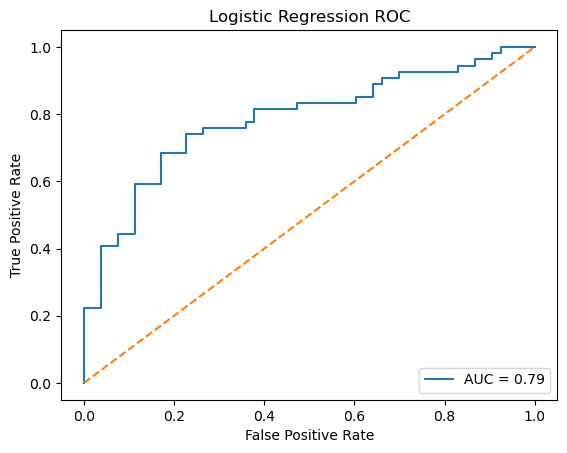

In [8]:
# Confusion Matrices for Logistic
plot_confusion_matrix(confusion_matrix(y_train, y_train_pred), title="Train Confusion Matrix (Logistic)")
plot_confusion_matrix(confusion_matrix(y_test, y_test_pred), title="Test Confusion Matrix (Logistic)")

# ROC Curve
def plot_roc_curve(y_true, y_scores, title="ROC Curve"):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.title(title)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

plot_roc_curve(y_test, log_model.predict_proba(X_test)[:, 1], title="Logistic Regression ROC")